# Ceci est un test

Je peux mettre du TS ici : 

````ts

number a = 5;

class TOTO{

const Array<T> list = [];
    
// anewxww comment here
}
```




# Sommaire

* [Exemples Introductifs](#examples)
    * [Généricité Simple](#section_1_1)Généricité Simple - Premiere Approche
    * [Généricité Simple - Bilan]()
    * [Généricité Multiple](#section_1_2)
    * [En Résumé]()
* [Chapter 2](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)


## Exemples Introductifs <a class="anchor" id="motivation"></a>







## Généricité Simple <a class="anchor" id="notions-de-base"></a>

### Généricité Simple (1/x)


```ts
/**
 * Types for extremely complex objects.
 */
// List of available courses
type Classes = "Advanced English" | "Maths" | "Physics" | "Computer Science" | "Babi-Foot";

// A student in the University
type Student = {
  administrationId: string;
  lastName: string;
  firstName: string;
  attendedClasses: Array<Classes>;
};
```


### Généricité Simple (2/x)

```ts
class University {
  name: string;
  students: Array<Student>;

  constructor(name: string) {
    this.name = name;
    this.students = new Array<Student>();
  }

  addStudent(student: Student): void {
    this.students = [...this.students, student];
  }

  removeStudent(administrationId: string): void {
    this.students = this.students.filter((student) => {
      return student.administrationId === administrationId;
    });
  }

  getStudent(administrationId: string): Student | undefined {
    return this.students.find((student) => {
      return student.administrationId === administrationId;
    });
  }
}
```

### Généricité Simple (3/x)

```ts
type DoctoralStudent = {
  administrationId: string;
  lastName: string;
  firstName: string;
  classesGiven: Array<Classes>;
  salary: number;
};
```

Que ce passe-t-il si on ajoute un doctorant à l'université ?

### Généricité Simple (4/x)


Dans les faits :

```ts

const robert: Student = {
  administrationId: "452115r",
  firstName: "DELACREUSE",
  lastName: "Robert",
  attendedClasses: ["Computer Science", "Babi-Foot"],
};

const nathan: DoctoralStudent = {
  administrationId: "559151d",
  firstName: "D",
  lastName: "Nathan",
  classesGiven: ["Babi-Foot"],
  salary: 2100,
};
const university = new University("Web Master"); // what an University !
university.addStudent(robert) // OK
university.addStudent(nathan) // KO : Property 'attendedClasses' is missing in type 'DoctoralStudent' but required in type 'Student'
```

### Généricité Simple (6/x)

**Problème** : Comment pouvoir ajouter un _DoctoralStudent_ dans un Objet de type _University_ ?


**Solution naive** : Rendre le type _student_ plus "englobant" : 

```ts
// A student in the University
type Student = {
    administrationId: string;
    lastName: string;
    firstName: string;
    attendedClasses: Array<Classes>;
};

type DoctoralStudent = {
  administrationId: string;
  lastName: string;
  firstName: string;
  classesGiven: Array<Classes>;
  salary: number;
};
```

```ts
type Academics = Student | DoctoralStudent
```

### Généricité Simple - Premiere Approche (1/2)

```ts
class University {
  name: string;
  academics: Array<Academics>;

  constructor(name: string) {
    this.name = name;
    this.academics = new Array<Academics>();
  }
 
  addAcademic(academic: Academics): void {
    this.academics = [...this.academics, academic];
  }
 
  removeAcademic(administrationId: string): void {
    this.academics = this.academics.filter((academic) => {
      return academic.administrationId === administrationId;
    });
  }

  getAcademic(administrationId: string): Academics | undefined {
    return this.academics.find((academic) => {
      return academic.administrationId === administrationId;
    });
  }}
```

Dans les faits \#2 :

```ts
const university2 = new University("Web Master reborn"); // instantiation of a new university
university2.addAcademic(robert); // OK
university2.addAcademic(nathan); // OK
```

### Généricité Simple - Premiere Approche (2/2)

<span style="color: green">+ On répond au besoin</span>  
<span style="color: red">- A chaque nouveaux types géré, il faut modifier le type "générique" de notre université</span>  
<span style="color: red">- On manipule des unions d'objects complexes</span>  

### Généricité Simple - Seconde Approche (1/4)

On utilise un type générique pour notre classe d'Université :

```ts
class University<T> {
    name: string;
    academics: Array<T>;

    constructor(name: string){
        this.name = name
        this.academics = new Array<T>;
    }

    addAcademic(academic: T): void{
        this.academics = [...this.academics, academic]
    }
   
    removeAcademic(administrationId: string): void {
        this.academics = this.academics.filter((academic) => {return academic.administrationId === administrationId})
        //Property 'administrationId' does not exist on type 'T' !
    }

    getAcademic(administrationId: string): T | undefined {
        return this.academics.find((academic) => {return academic.administrationId === administrationId})
        //Property 'administrationId' does not exist on type 'T' !
    }
}
```

### Généricité Simple - Seconde Approche (2/4)


**Solution** : On part d'un type _Academics_ le plus épuré possible : 

```ts
type Academics = {
    administrationId: string;
    lastName: string;
    firstName: string;
};
```

### Généricité Simple - Seconde Approche (3/4)

```ts
class University<T extends Academics> {
    name: string;
    academics: Array<T>;

    constructor(name: string){
        this.name = name
        this.academics = new Array<T>;
    }

    addAcademic(academic: T): void{
        this.academics = [...this.academics, academic]
    }
   
    removeAcademic(administrationId: string): void {
        this.academics = this.academics.filter((academic) => {return academic.administrationId === administrationId})
        //OK
    }

    getAcademic(administrationId: string): T | undefined {
        return this.academics.find((academic) => {return academic.administrationId === administrationId})//OK
    }
}
```

### Généricité Simple - Seconde Approche (4/4)

```ts
const university2 = new University2<Academics>("Web Master apotheosis"); // instantiation of a new university
university2.addAcademic(robert) // OK
university2.addAcademic(nathan) // OK, this is fine
```


### Généricité Simple - Bilan


Avec la seconde approche :

<span style="color: green">+ On répond au besoin</span>  
<span style="color: green">+ La gestion des types concernés est faite à un seul endroit</span>  
<span style="color: green">+ A chaque nouveaux types géré, rien ne change dans la structure de la classe</span>  
<span style="color: green">+ Contraintes explicite sur le type attendu à l'instanciation d'une nouvelle univresité</span>



## Généricité Multiple <a class="anchor" id="exemple"></a>




### Généricité Multiple (1/6)

On se donne la définition d'un dictionaire suivante :

```ts
interface Dict<T> {
  [k: string]: T;
}
```


### Généricité Multiple (2/6)

```ts
function mapDict<T, S>(
  inputDict: Dict<T>,
  mapFunction: (original: T, key: string) => S
): Dict<S> {
  const outDict: Dict<S> = {};
  for (let k of Object.keys(inputDict)) {
    const thisVal = inputDict[k];
    outDict[k] = mapFunction(thisVal, k);
  }
  return outDict;
}
```

### Généricité Multiple (3/6)

```ts
function filterDict<T>(
  inputDict: Dict<T>,
  filterFunction: (value: T, key: string) => boolean
): Dict<T> {
  const outDict: Dict<T> = {};
  for (let k of Object.keys(inputDict)) {
    const thisVal = inputDict[k];
    if (filterFunction(thisVal, k)) outDict[k] = thisVal;
  }
  return outDict;
}
```

### Généricité Multiple (4/6)

```ts
function reduceDict<T, S>(
  inputDict: Dict<T>,
  reducerFunction: (currentVal: S, dictItem: T, key: string) => S,
  initialValue: S
): S {
  let value = initialValue;
  for (let k of Object.keys(inputDict)) {
    const thisVal = inputDict[k];
    value = reducerFunction(value, thisVal, k);
  }
  return value;
}
```

### Généricité Multiple  (5/6)

Testons tout cela : 

```ts
const fruits = {
  apple: { color: "red", mass: 100 },
  grape: { color: "red", mass: 5 },
  banana: { color: "yellow", mass: 183 },
  lemon: { color: "yellow", mass: 80 },
  pear: { color: "green", mass: 178 },
  orange: { color: "orange", mass: 262 },
  raspberry: { color: "red", mass: 4 },
  cherry: { color: "red", mass: 5 },
};
```

### Généricité Multiple  (6/6)

```ts
// fruits with kg mass :
const fruitsWithKgMass = mapDict(fruits, (fruit, name) => ({
  ...fruit,
  kg: 0.001 * fruit.mass,
  name,
}));

// only red fruits
const redFruits = filterDict(fruits, (fruit) => fruit.color === "red");

// If we had one of each fruit, how much would the total mass be ?
const oneOfEachFruitMass = reduceDict(
  fruits,
  (currentMass, fruit) => currentMass + fruit.mass,
  0
);
```

## En résumé 

> Un type générique s’adapte pour exécuter la même fonction sur différents types de données. Avec une classe ou procédure générique, il n'y a pas besoin de définir une version distincte pour chaque type de données lié à notre classe ou procédure.

> On peut contraindre ces types générique, soit par une borne inférieure (ici notre extends), dans d'autres langages, on peut également contraindre une borne supérieure (avec le mot cléf _super_ en JAVA par exemple).

> On peut utiliser plusieurs types génériques dans la même définitions de class, méthode, ...

> On pourrait comparer cet élément de programmation à un tournevis à têtes interchangeables :
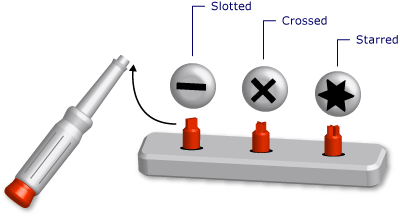

## Chronologie d'Apparition des Types Génériques <a class="anchor" id="example"></a>





2004 : JDK 1.5, appelé Java 5.

12 août 2011 -> ajout des templates -> c++

rust -> 2015 pour la release 1.1.0

Typescript -> 22 February 2016

    PEP 484 – Type Hints -> python -> 29-Sep-2014 mais il faudra attendre PEP 560 – Core support for typing module and generic types en 03-Sep-2017 pour un meilleur support, ...et encore + expliquer ce qu'il manque + exemple université + mapper en python + transition.


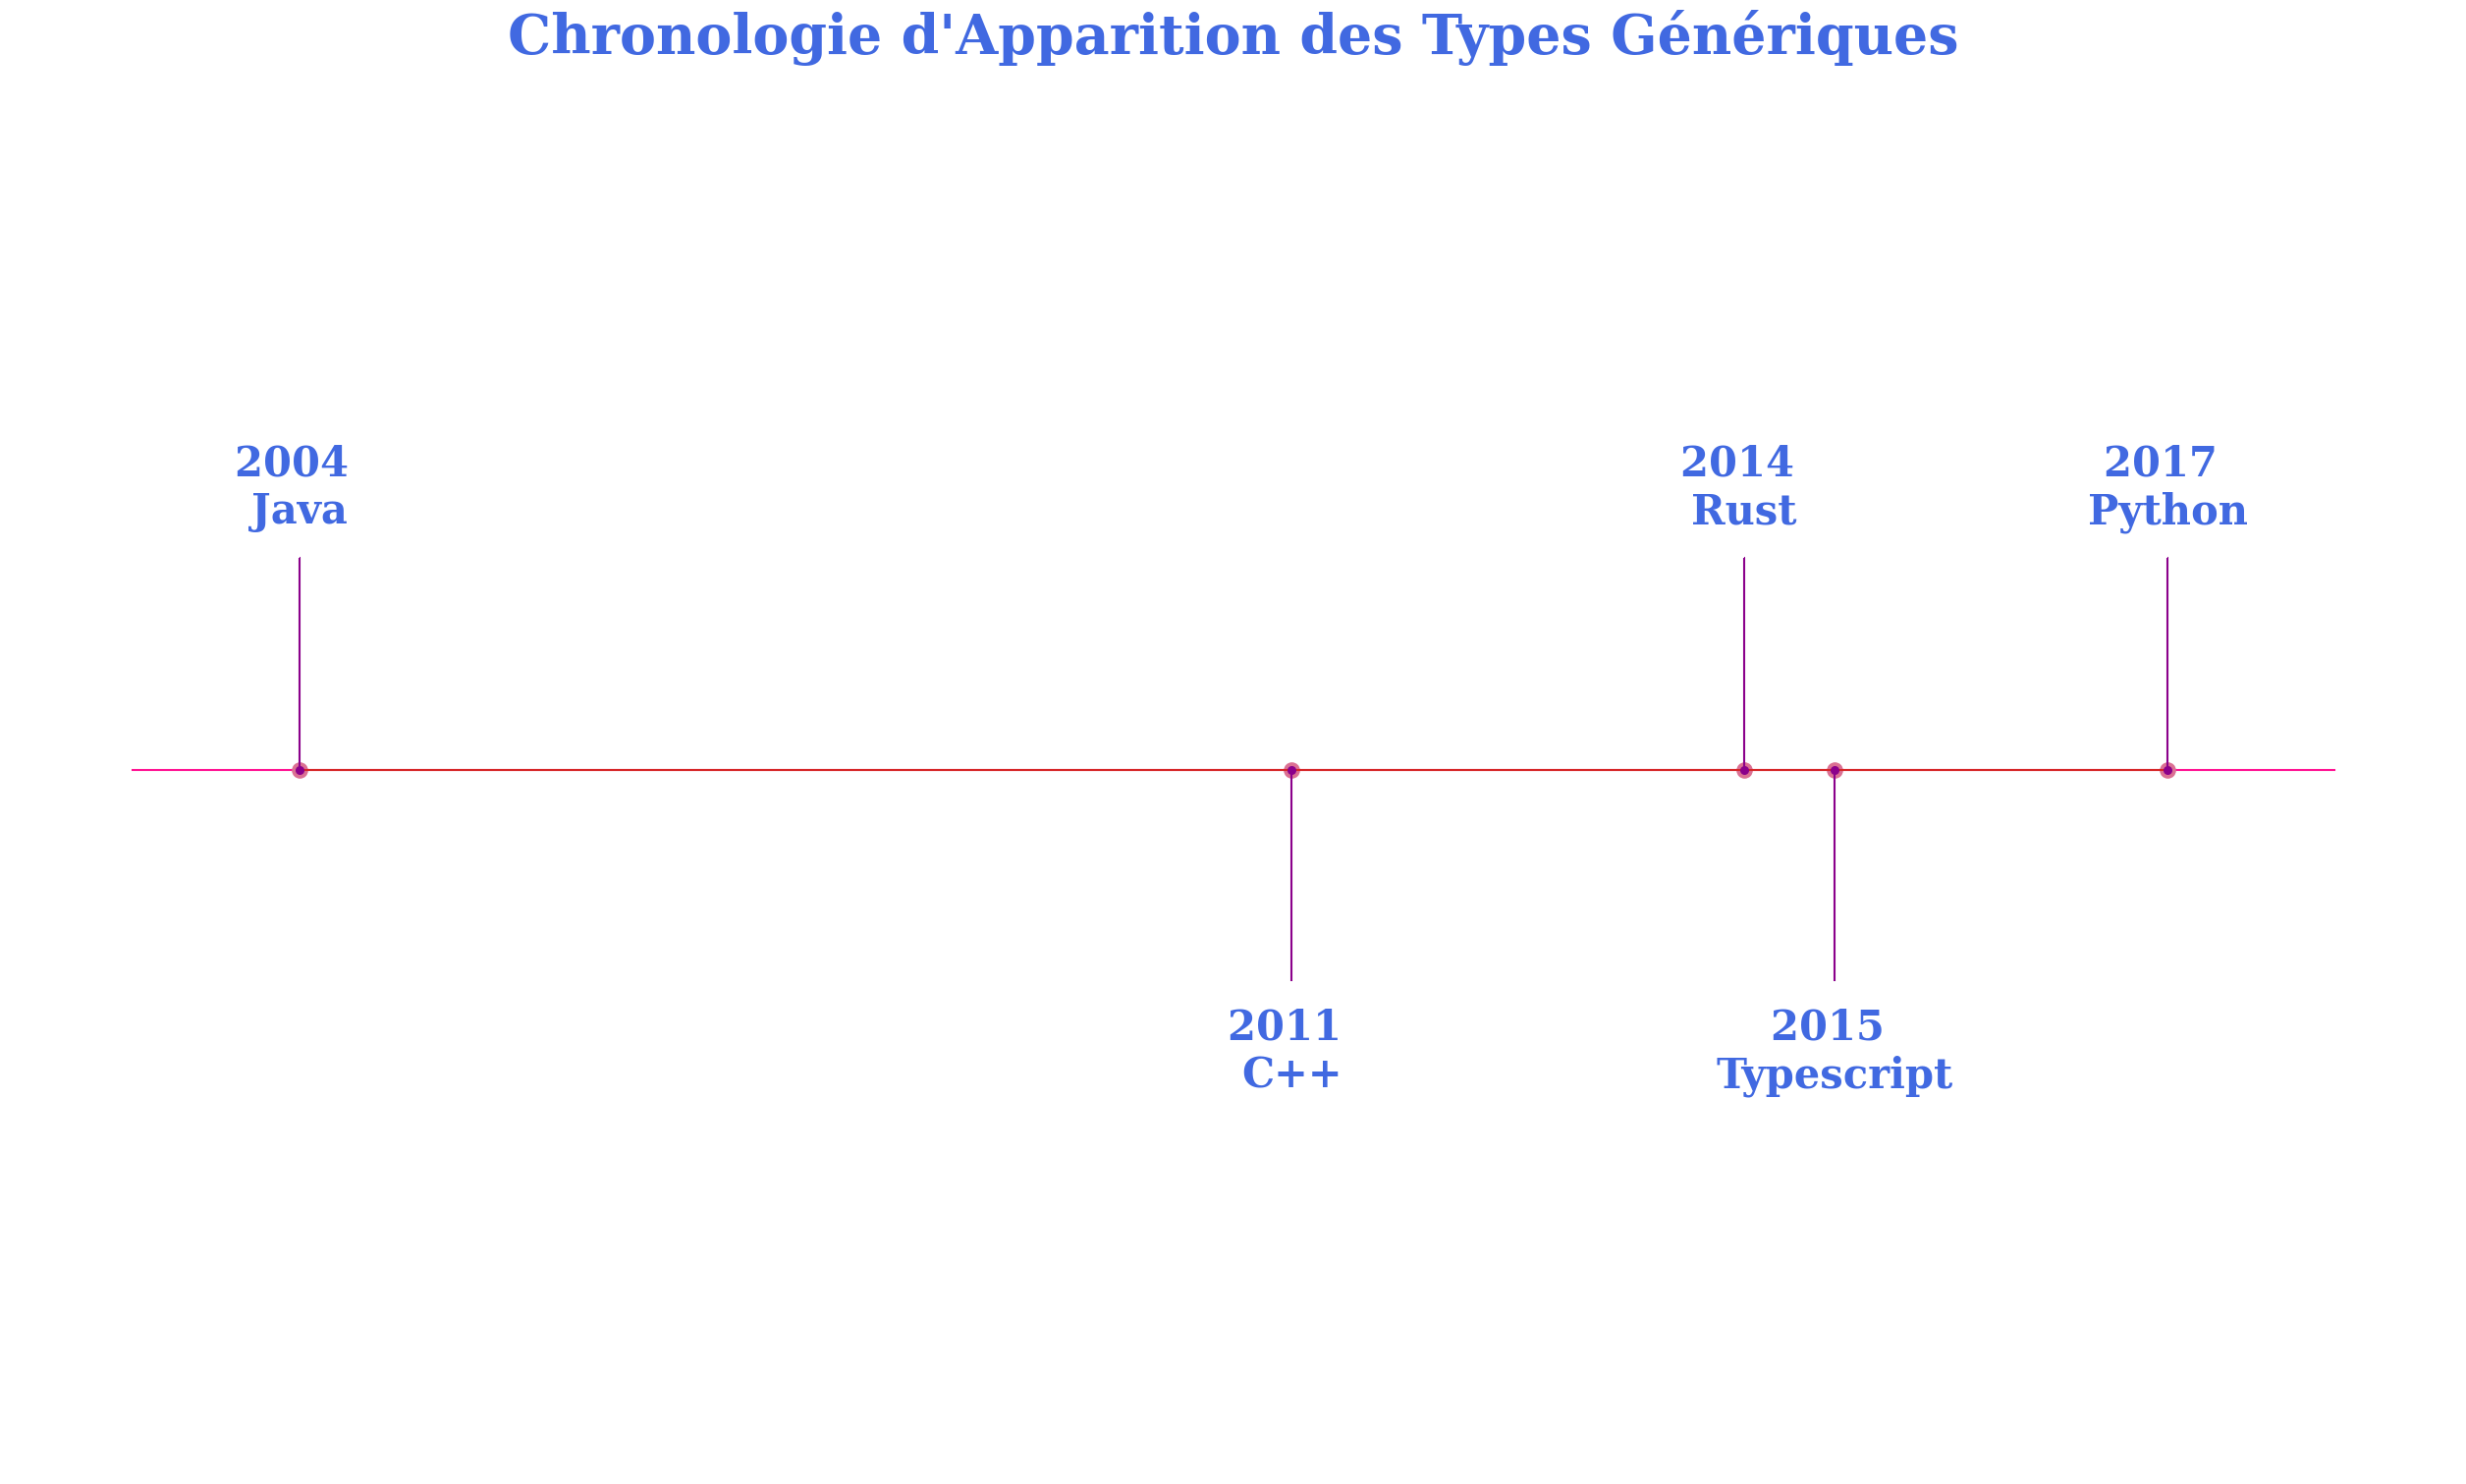

In [3]:
import matplotlib.pyplot as plt
from datetime import date
import numpy as np
 
%matplotlib inline

dates = [date(2004, 9, 30), date(2011, 8, 12), date(2014, 9, 29), date(2015, 5, 15), date(2017, 9, 3)]
min_date = date(np.min(dates).year - 2, np.min(dates).month, np.min(dates).day)
max_date = date(np.max(dates).year + 2, np.max(dates).month, np.max(dates).day)
 
labels = ['Java', 'C++', 'Rust','Typescript', 'Python']
# labels with associated dates
labels = ['{0:%Y} \n{1}'.format(d, l) for l, d in zip (labels, dates)] #  default date format is '{0:%d %b %Y}:\n{1}'

fig, ax = plt.subplots(figsize=(25, 15), constrained_layout=True)
_ = ax.set_ylim(-1, 1)
_ = ax.set_xlim(min_date , max_date)
_ = ax.axhline(0, xmin=0.05, xmax=0.95, c='deeppink', zorder=1)
 
_ = ax.scatter(dates, np.zeros(len(dates)), s=120, c='palevioletred', zorder=2)
_ = ax.scatter(dates, np.zeros(len(dates)), s=30, c='darkmagenta', zorder=3)

label_offsets = np.zeros(len(dates))

label_offsets[::2] = 0.35
label_offsets[1::2] = -0.45
for i, (l, d) in enumerate(zip(labels, dates)):
    _ = ax.text(d, label_offsets[i], l, ha='center', fontfamily='serif', fontweight='bold', color='royalblue',fontsize=30)

stems = np.zeros(len(dates))
stems[::2] = 0.3
stems[1::2] = -0.3   
markerline, stemline, baseline = ax.stem(dates, stems)
_ = plt.setp(markerline, marker=',', color='darkmagenta')
_ = plt.setp(stemline, color='darkmagenta')

# hide lines around chart
for spine in ["left", "top", "right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)
 
# hide tick labels
_ = ax.set_xticks([])
_ = ax.set_yticks([])
 
_ = ax.set_title("Chronologie d'Apparition des Types Génériques", fontweight="bold", fontfamily='serif', fontsize=40, 
                 color='royalblue')


### Généricité Simple - Seconde Approche... en python! (2/4)

In [ ]:
```python
type Academics = {
    administrationId: string;
    lastName: string;
    firstName: string;
};
```




## Notions Avancées <a class="anchor" id="advanced-notions"></a>


 Dans cette section sera explicité les notions avancés sur les types génériques dans un exemple concret avec une classe map, filter et reduce sur des dictionaires ! J'ai hate 




# Sources



Relachage des versions des languages qui introduisent les types génériques :
 + https://github.com/rust-lang/rust/blob/master/RELEASES.md
 + https://en.wikipedia.org/wiki/TypeScript#Release_history
 + https://fr.wikipedia.org/wiki/C%2B%2B#Fonctionnalit%C3%A9s_introduites
 + https://koor.fr/Java/Tutorial/java_generics_introduction.wp